In [46]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

In [47]:
# Implementação do nosso bungee jumping

# Parâmetros do nosso modelo
g = 9.8 #aceleração da gravidade, em m/s2
r = 1 #comprimento do fio, em m
m = 70 #massa do pêndulo
𝜌 = 1.204 # densidade do ar, em kg/m3
Cd = 0.5
h = 1.70 #m
A = (m*h)/3600
l0 = 100
vt = 54 # velocidade terminal do corpo humano em m/s

y = 0
vy = 0

dt = 1e-3
ls_tempo = np.arange(0, 50, dt)
cond_inicial = [y,vy]

D = ((m*g) / vt)

# Função que implementa o nosso modelo
def modelo(X,t):
    y = X[0]
    vy = X[1]
    x = (y-l0)
    Ar = (0.5*𝜌*Cd*A*vy**2)
    k = 12 #((2*m*g*l0)/(x**2))
    dhdt = vy
    if y < l0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - D*vy
    if y <= 25.5:
        k = 13.72
    elif 25.5 <  y <= 35.33:
        k = 12
    else:
        k = 16.66
    derivadas = [dhdt,dvydt]
    return derivadas

result = odeint(modelo,cond_inicial,ls_tempo)
h = result[:,0]

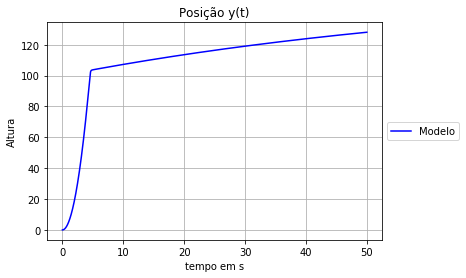

In [48]:
plt.title("Posição y(t)")
plt.plot(ls_tempo,h, 'b-', label="Modelo")
plt.xlabel("tempo em s")
plt.ylabel("Altura")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()